1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


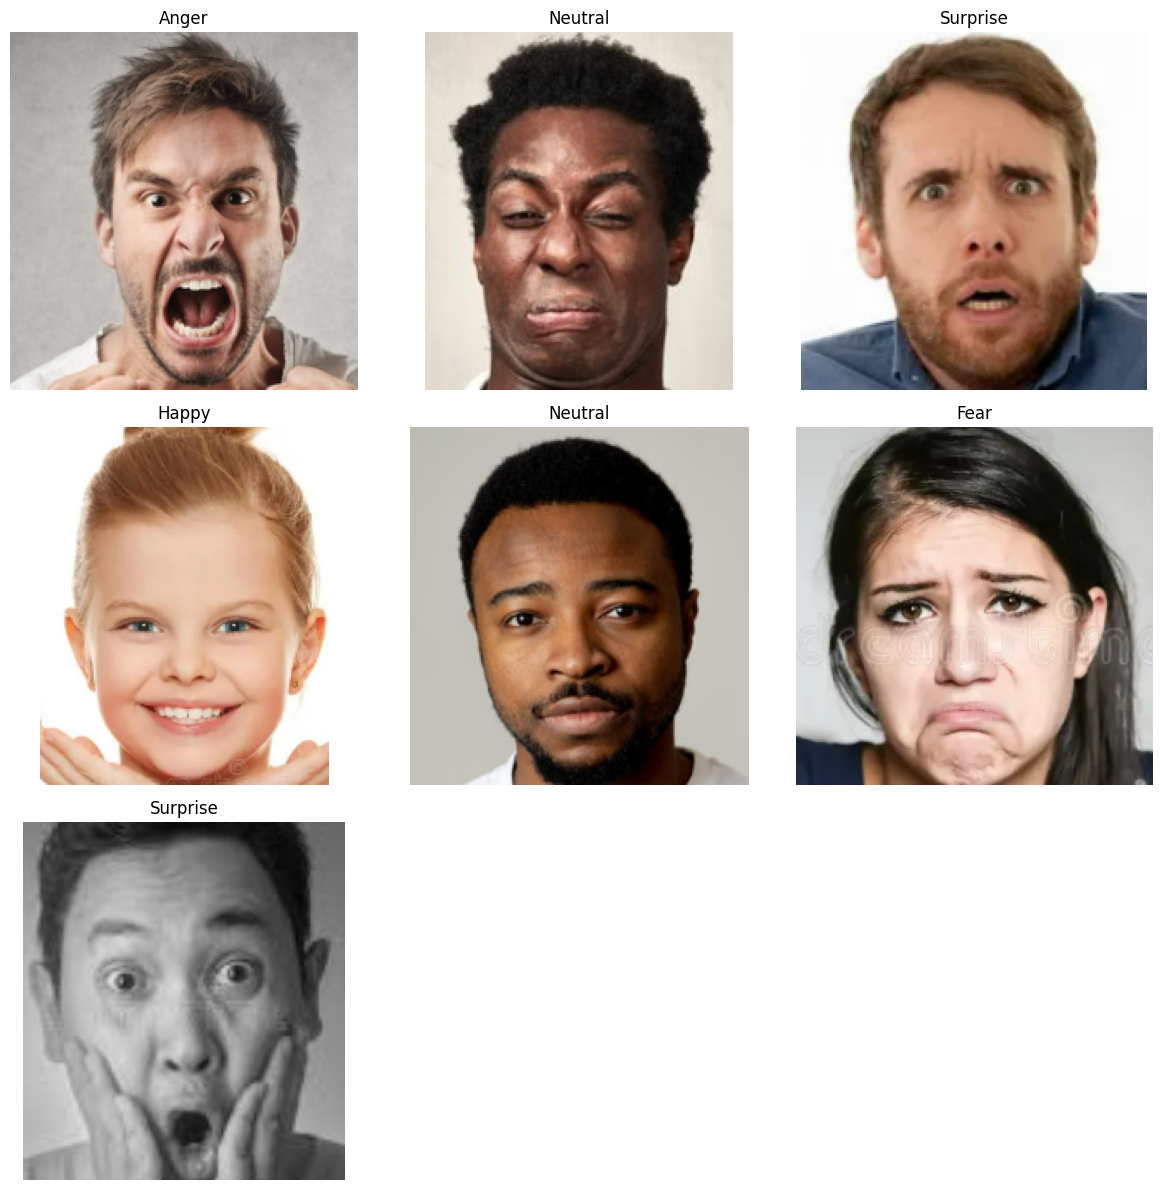

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display

model = load_model('./models/finetunned_model.h5')  

img_folder = './img/'  

CLASS_LABELS = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', 'Surprise']

fig = plt.figure(figsize=(12, 12))  
rows, cols = 3, 3  

i = 0
for img_file in os.listdir(img_folder):
    img_path = os.path.join(img_folder, img_file)
    
    if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    img = image.load_img(img_path, target_size=(224, 224)) 
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = CLASS_LABELS[predicted_class[0]]

    ax = fig.add_subplot(rows, cols, i + 1)  
    ax.imshow(image.load_img(img_path))  
    ax.set_title(predicted_label, fontsize=12) 
    ax.axis('off')  
    i += 1

    if i >= rows * cols: 
        break

plt.tight_layout()
plt.show()
